- Choose one variable and plot that variable four different ways.
- Choose two continuous variables, and plot them three different ways.
- Choose one continuous variable and one categorical variable, and plot them six different ways.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy.stats import spearmanr
import csv
from scipy import stats, integrate
%matplotlib inline

In [3]:
movies2009 = pd.read_csv('http://people.sc.fsu.edu/~jburkardt/datasets/stats/movies_2009.csv')
movies2010 = pd.read_csv('http://people.sc.fsu.edu/~jburkardt/datasets/stats/movies_2010.csv')
movies2011 = pd.read_csv('http://people.sc.fsu.edu/~jburkardt/datasets/stats/movies_2011.csv')

In [4]:
movies2011.columns = [x.strip().strip('"') for x in list(movies2011)]

In [5]:
movies2011.head()

,Rank,Title,Release,Distributor,Genre,MPAA,Gross,Tickets,Adjusted Gross
0,1,Harry Potter and the Deathly Hallows: Part II,7/15/2011,Warner Bros.,Adventure,PG-13,381011219,47865731,377660618
1,2,Transformers: Dark of the Moon,6/29/2011,Paramount Pictures,Action,PG-13,352390543,44270169,349291633
2,3,"The Twilight Saga: Breaking Dawn, Part 1",11/18/2011,Summit Entertainment,Drama,PG-13,275530738,34614414,273107726
3,4,The Hangover 2,5/26/2011,Warner Bros.,Comedy,R,254464305,31967878,252226557
4,5,Pirates of the Caribbean: On Stranger Tides,5/20/2011,Walt Disney Pictures,Adventure,PG-13,241063875,30284406,238943963


In [6]:
WarnerBros = movies2011[movies2011['Distributor'] == 'Warner Bros.']

- Choose one variable and plot that variable four different ways.

In [7]:
WBGross = WarnerBros['Gross']

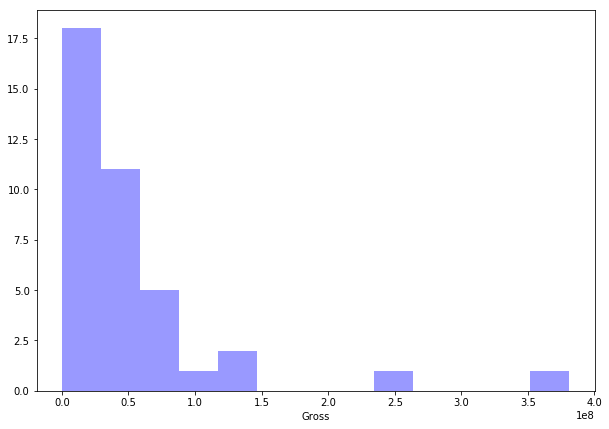

In [8]:
plt.figure(figsize=(10,7))
sns.despine(left=True)
sns.distplot(WBGross, kde=False, color="b")

This is a histogram of the Gross income for movies made by Warner Brothers in 2011. This shows that the majority of movies earned under 150 Million dollar. The benefit of this chart is that it gives a broad picture of the earning for Warner Brother movies. However, this view is simplistic and can't tell us more information about what kind of movies earned more or why. 

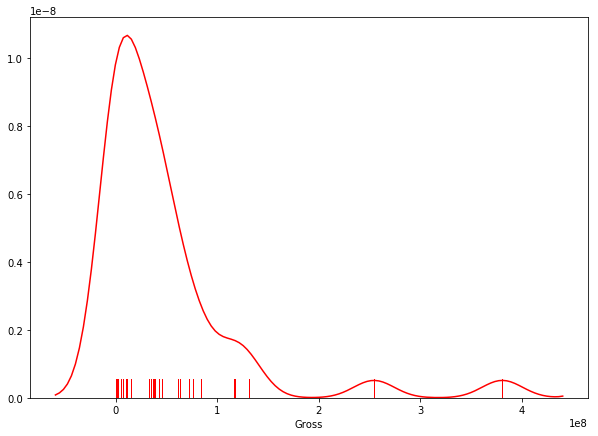

In [9]:
plt.figure(figsize=(10,7))
sns.despine(left=True)
sns.distplot(WBGross, hist=False, rug=True, color="r")

This is a kernel denisty estimate that gives a smoother picture of the same data as the histogram above. Like the histogram, it shows that the majority of movies made less than 200 million with most of those earning under 100 million. The broad picture does allow us to see the two outliers that had returns greater than 200 million but this visualization can't tell us any more information about these movies. 

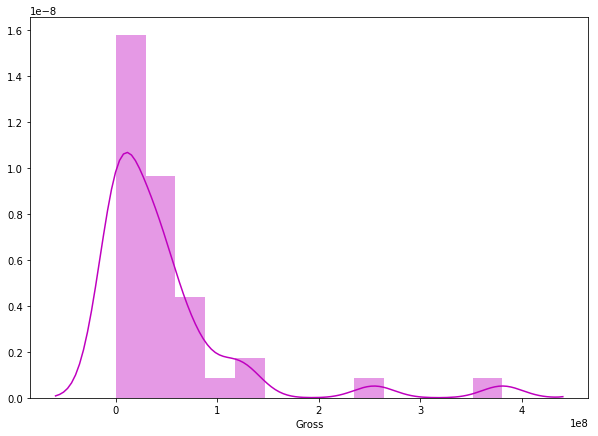

In [10]:
plt.figure(figsize=(10,7))
sns.despine(left=True)
sns.distplot(WBGross, color="m")

This graph is a combined histogram and kernel density estimate without the kernels. Since it contains the same data as above, the benefit of this visualization is both the histogram that gives a sense of how many movies fall under each range and the smother line of the denisty estimate that shows the overall shape of movie earnings. 

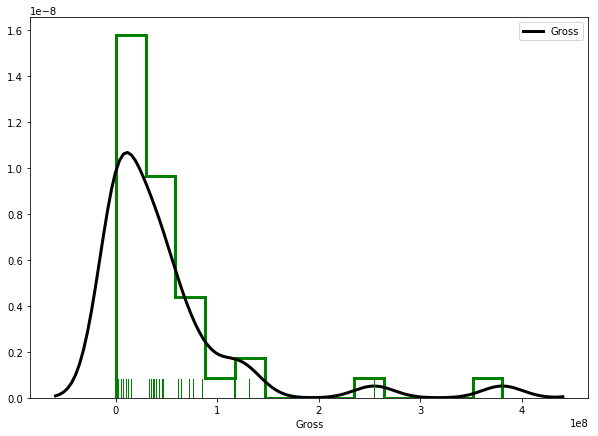

In [11]:
plt.figure(figsize=(10,7))
sns.distplot(WBGross, rug=True, rug_kws={"color": "g"},
             kde_kws={"color": "k", "lw": 3, "label": "Gross"},
             hist_kws={"histtype": "step", "linewidth": 3,
                       "alpha": 1, "color": "g"})

This graph combines the previous three visualization to show the kernal markings, kernal denisty estimate, and histogram distributions of the data. While it is an interesting way to look at the data, I believe that all three methods together distract from each other when they adequately conveyed the broad picture of the gross movie earnings separately. 

- Choose two continuous variables, and plot them three different ways.

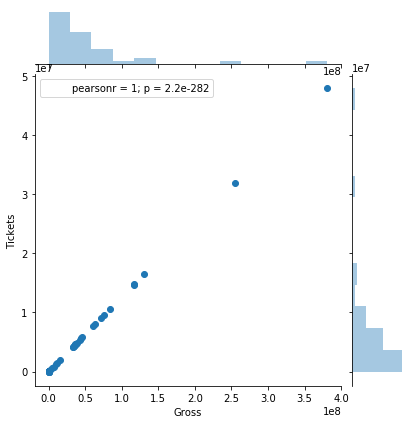

In [12]:
g = sns.jointplot(x="Gross", y="Tickets", data=WarnerBros)

This is a scatter plot with marginal histograms that shows the expected one to one ratio of gross movie earnings and tickets sold. The benefit of this graph is the comparison of where the values fall on the inner graph and how they appear stacked together in a histogram bar. I don't see many down sides to this graph except that the data shown here isn't very useful for telling us more about these movies. 

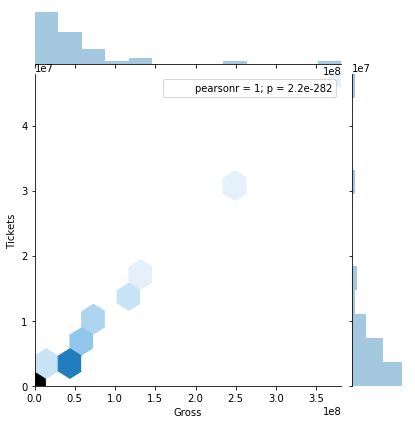

In [13]:
g = sns.jointplot("Gross", "Tickets", data=WarnerBros, kind="hex")

This is a graph with hexagonal bins and marginal histograms. It shows the same information as above with the only difference being the coloration used to visualize where most of the movies fall into. A down side to this graph is how do we know how many movies the darker colors signify? This graph would be hard to interpret for a layman. 

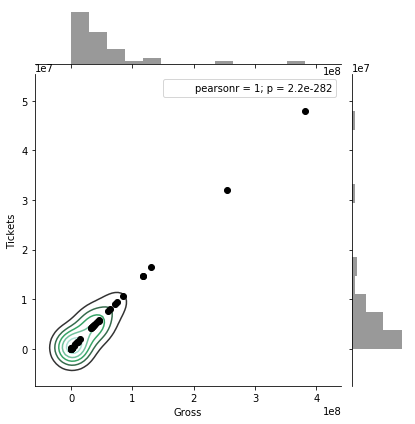

In [14]:
g = (sns.jointplot("Gross", "Tickets", data=WarnerBros, color="k")
     .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

This is a scatter plot with a joint denisty estimate and marginal histogram. It shows the same information as the scatter plot and histogram above but it also shows the locations of highest movie denisty. Scatter plots by them selves can have overlapping values that hide how many values fall into that range. The benefit of the joint density estimate is that it tells us where the focused center of movie values are located. The downside is that it doesn't tell us the quantitiy of movies required to make a joint denisty estimate. 

- Choose one continuous variable and one categorical variable, and plot them six different ways.

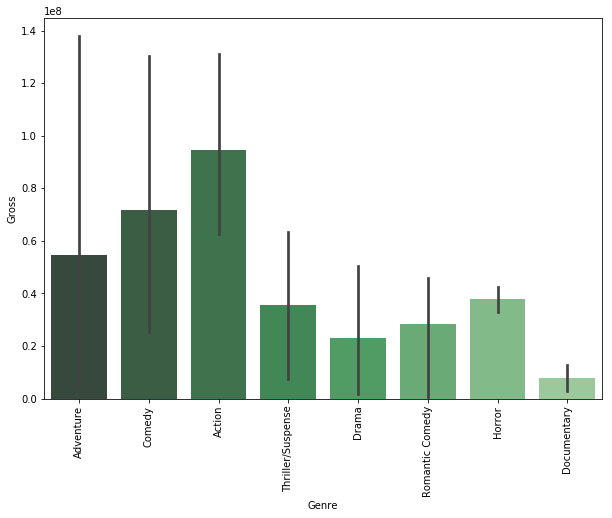

In [15]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
sns.barplot(x = "Genre", y = "Gross", palette="Greens_d", data=WarnerBros)

This is a bar plot of the Gross earning for movies by their Genre categroy. The bar graphs each show the mean earnings for each genre and the black line is the error bar which is the uncertainty for the means listed for each genre. It is easily seen that the 'Adventure' genre has greater uncertainty compared to the 'Horror' or 'Documentary' genres. This is likely due to the greater variability of earnings for the 'Adventure' genre compared to the 'Horror' genre. The benefit of this type of graph is that it shows how confident we can be about the visualized means and where we might have to do more investigation.  

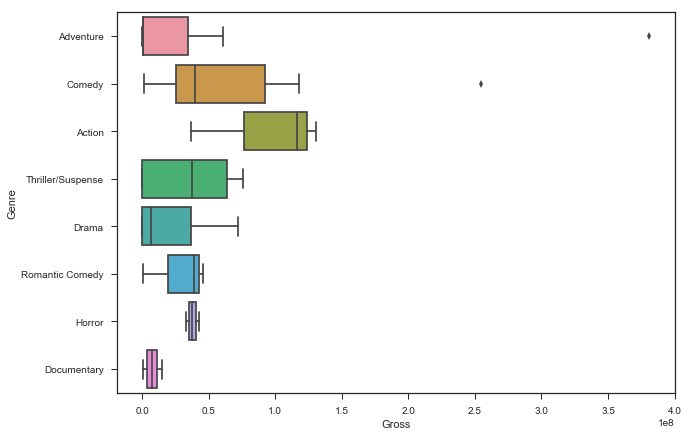

In [38]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Gross", y="Genre", data=WarnerBros)

This is a horizontal boxplot this is very useful to show the mean and range of values for each genre as well as any outliers. It is easy to draw from this graph that there are two main outliers for our data and we can now better delve into the specific for each genre. 

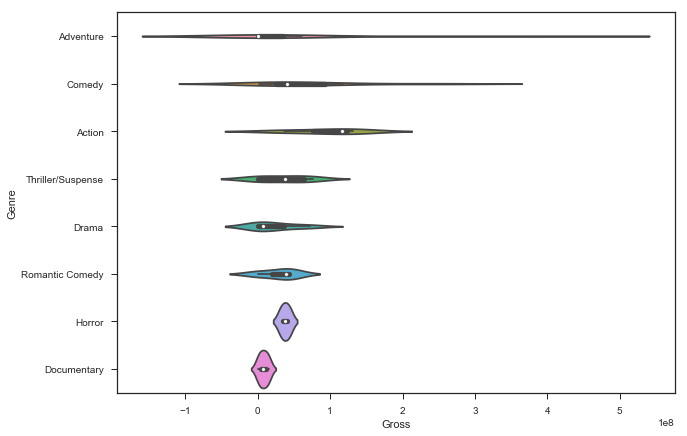

In [40]:
plt.figure(figsize=(10,7))
ax = sns.violinplot(x="Gross", y="Genre", data=WarnerBros)

This is a violin plot that acts similarly to a box plot, however it also features a kernel denisty estimation of the underlying distribution. These violins are smooth and narrow because the movies have a large range of values and there are not many movies in this data set. The benefit of this graph is it's ability to show the kernel denisty estimation, but unlike the box plot it doesn't show us the outliers. 

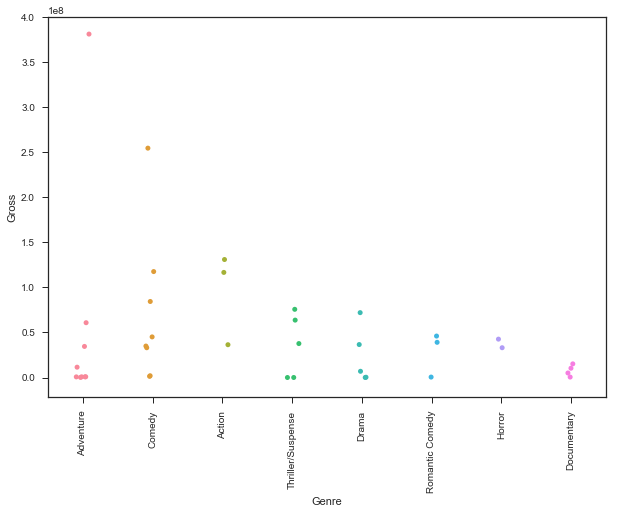

In [21]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
ax = sns.stripplot(x="Genre", y="Gross", data=WarnerBros, jitter=True)

A strip plot is a scatterplot where one of the variables is categorical. This graph also has 'jitter' points which allows us to see the distribution of the values. This graph is good at showing where most of the movie earnings cluster and a rough sense of how many movies are in each category. 

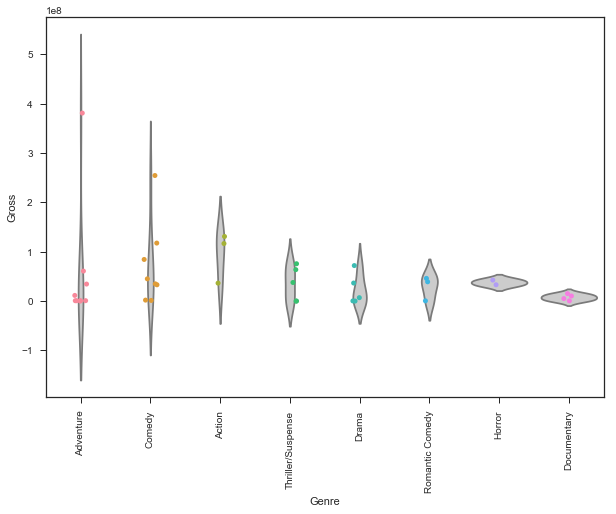

In [23]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
ax = sns.violinplot(x="Genre", y="Gross", data=WarnerBros,
                    inner=None, color=".8")
ax = sns.stripplot(x="Genre", y="Gross", data=WarnerBros, jitter=True)

This is a combined violin and strip plot for the same data. It has the benefit of showing both the kernel denisty estimates and the specific distributions of the movie values. This allows us to make better sense of why the 'Adventure' and 'Comedy' genres are so long because of the outliers while also seeing the means for each category. 

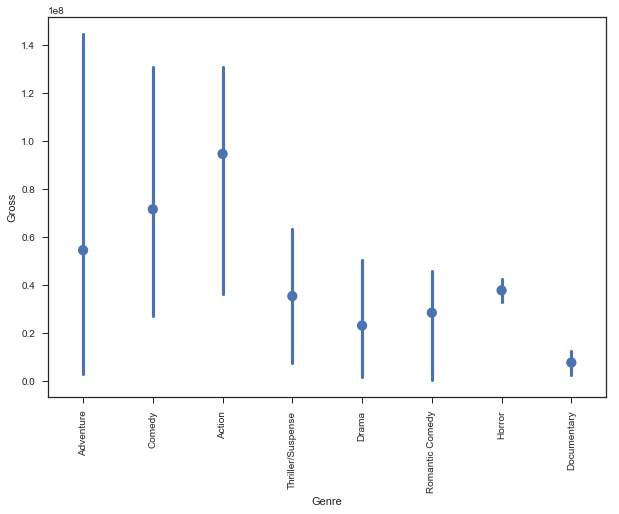

In [31]:
plt.figure(figsize=(10,7))
plt.xticks(rotation = 90)
ax = sns.pointplot(x="Genre", y="Gross", data=WarnerBros, join=False)

This is a point plot where the single point for each category is the mean based on the positions of scatter plot points. The lines on both sides are error bars that indicate the uncertainty around each estimate of the central tendency. Similarly to the first graph, there is more uncertainty in the 'Adventure' genre due to the greater range of gross earnings while there is very little uncertainty for 'Horror' and 'Documenty' because their values are much closer together. However, this graph doesn't tell us how many movies are in each category or how many outliers there are. 

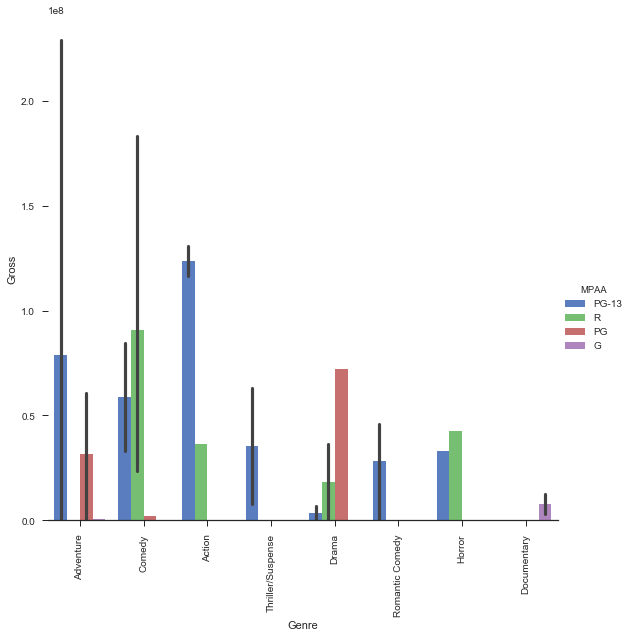

In [32]:
g = sns.factorplot(x="Genre", y="Gross", hue="MPAA", data=WarnerBros,
                   size=8, kind="bar", palette="muted")

g.despine(left=True)
plt.xticks(rotation = 90)
g.set_ylabels("Gross")

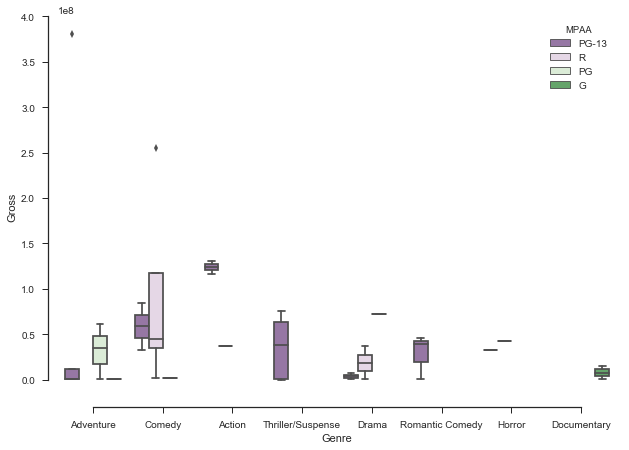

In [33]:
sns.set(style="ticks")
plt.figure(figsize=(10,7))
sns.boxplot(x="Genre", y="Gross", hue="MPAA", data=WarnerBros, palette="PRGn")
sns.despine(offset=10, trim=True)